# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [12]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 3.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/12.8 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 5.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 5.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 5.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 5.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 5.7 MB/s eta 0

## Importing the necessary libraries

In [14]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [15]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [17]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [20]:
# Inspect the DataFrame with True News to understand the given data

# Basic structure and shape
print(f"Shape of True News DataFrame: {true_df.shape}")
print("\nColumn Names:", true_df.columns.tolist())

# Data types of each column
print("\nData Types:\n", true_df.dtypes)

# Check for missing values
print("\nMissing Values:\n", true_df.isnull().sum())

# Preview the first few rows
display(true_df.head())


Shape of True News DataFrame: (21417, 3)

Column Names: ['title', 'text', 'date']

Data Types:
 title    object
text     object
date     object
dtype: object

Missing Values:
 title    0
text     0
date     0
dtype: int64


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [21]:
# Inspect the DataFrame with Fake News to understand the given data
# Basic structure and shape
print(f"Shape of True News DataFrame: {fake_df.shape}")
print("\nColumn Names:", fake_df.columns.tolist())

# Data types of each column
print("\nData Types:\n", fake_df.dtypes)

# Check for missing values
print("\nMissing Values:\n", fake_df.isnull().sum())

# Preview the first few rows
display(fake_df.head())


Shape of True News DataFrame: (23523, 3)

Column Names: ['title', 'text', 'date']

Data Types:
 title    object
text     object
date     object
dtype: object

Missing Values:
 title    21
text     21
date     42
dtype: int64


title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [22]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [23]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [24]:
# Print the column names of both DataFrames
print("True News Dataframe Columns: " ,true_df.columns)
print("Fake News Dataframe Columns: " ,fake_df.columns)

True News Dataframe Columns:  Index(['title', 'text', 'date'], dtype='object')
Fake News Dataframe Columns:  Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [26]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [28]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [29]:
# Display the first 5 rows of the combined DataFrame to verify the result
print(f"Combined DataFrame shape: {combined_df.shape}")
combined_df.head(5)


Combined DataFrame shape: (44940, 4)


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [31]:
# Check Presence of Null Values

combined_df.isnull().sum()


title         21
text          21
date          42
news_label     0
dtype: int64

In [32]:
# Handle Rows with Null Values

# Drop rows with any null values
combined_df.dropna(inplace=True)

# Reset index after dropping
combined_df.reset_index(drop=True, inplace=True)

# Confirm cleanup
print("Null values after cleanup:")
print(combined_df.isnull().sum())

print(f"Combined DataFrame shape after handling null values: {combined_df.shape}")

Null values after cleanup:
title         0
text          0
date          0
news_label    0
dtype: int64
Combined DataFrame shape after handling null values: (44898, 4)


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [34]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'].astype(str) + ' ' + combined_df['text'].astype(str)

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df.drop(columns=['title', 'text', 'date'], inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head(5)

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [38]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [40]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text_basic(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [42]:
# Apply the function to clean the news text and remove all unnecessary elements
cleaned_text =  combined_df['news_text'].apply(clean_text_basic)
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] =cleaned_text

In [43]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [46]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemmatize_nouns(text):
    doc = nlp(text)
    noun_lemmas = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.tag_ in {"NN", "NNS"}
    ]
    return " ".join(noun_lemmas)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [48]:
# Apply POS tagging and lemmatization function to cleaned text
lemmatized_text = df_clean['cleaned_text'].progress_apply(lemmatize_nouns)
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = lemmatized_text

100%|██████████████████████████████████████████████████████████████████████████| 44898/44898 [2:05:47<00:00,  5.95it/s]


### Save the Cleaned data as a csv file (Recommended)

In [176]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [215]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [217]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [219]:
# Check the number of non-null entries and data types of each column
print(df_clean.isna().sum())
df_clean.info()

news_label          0
cleaned_text        9
lemmatized_text    20
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44889 non-null  object
 2   lemmatized_text  44878 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [222]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [227]:
# Add a new column to calculate the character length of cleaned news text
train_df['char_len_clean'] = train_df['cleaned_text'].apply(lambda x: len(str(x)))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['char_len_lemmatized'] = train_df['lemmatized_text'].apply(lambda x: len(str(x)))


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

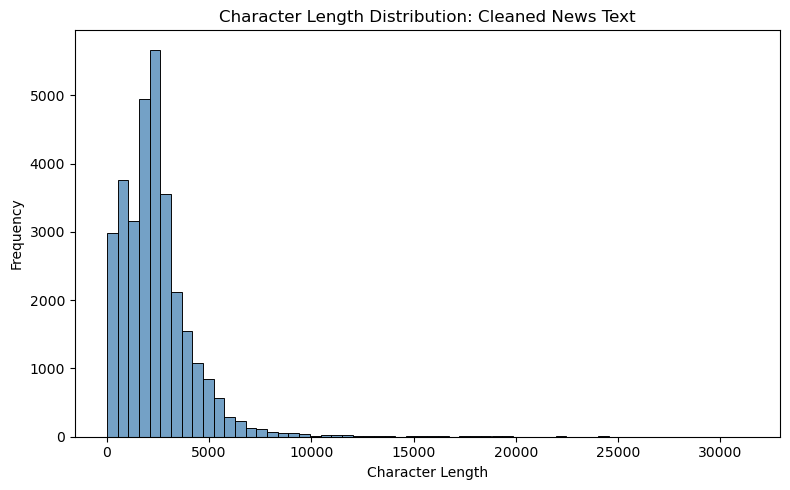

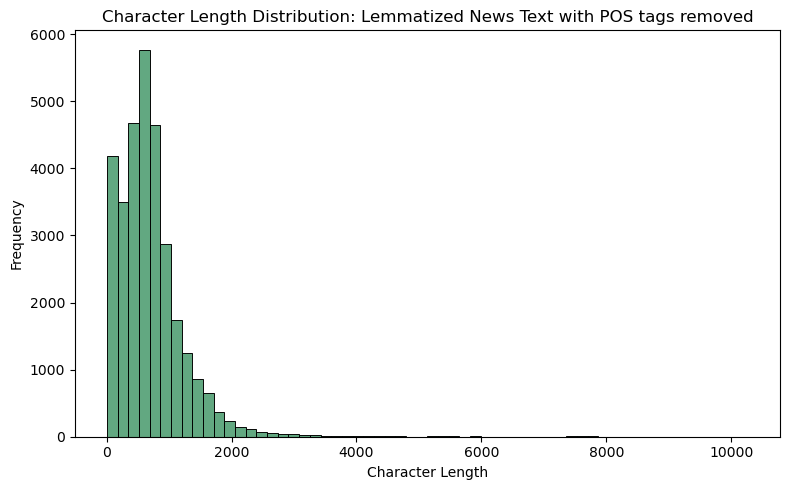

In [230]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(8, 5))
sns.histplot(train_df['char_len_clean'], bins=60, color='steelblue')
plt.title('Character Length Distribution: Cleaned News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(8, 5))
sns.histplot(train_df['char_len_lemmatized'], bins=60, color='seagreen')
plt.title('Character Length Distribution: Lemmatized News Text with POS tags removed')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

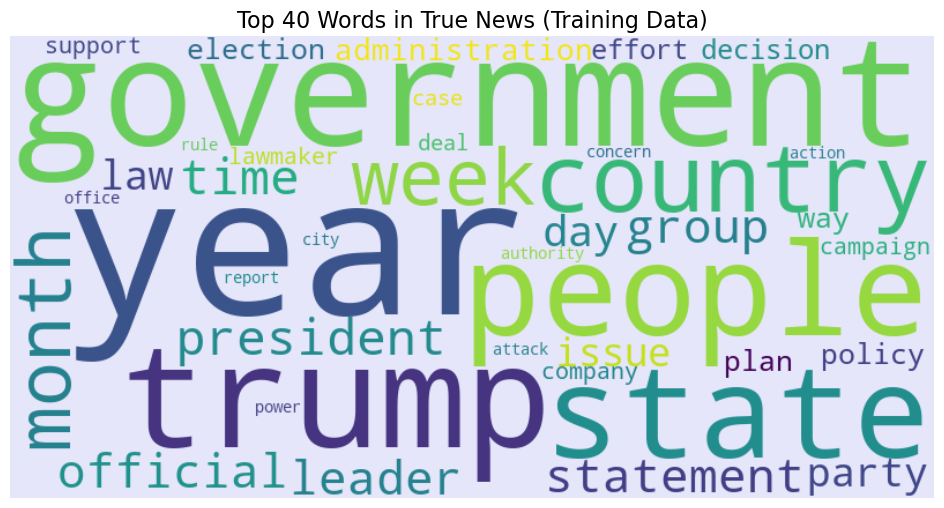

In [234]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
train_true_news=train_df[train_df["news_label"] == 1 ]["lemmatized_text"]
train_true_news=train_true_news.dropna().astype(str).values
train_true_news=" ".join(train_true_news)
# Generate word cloud for True News
wc = WordCloud(width=800, height=400, max_words=40,background_color='lavender', colormap='viridis')
wc.generate(train_true_news)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)', fontsize=16)
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

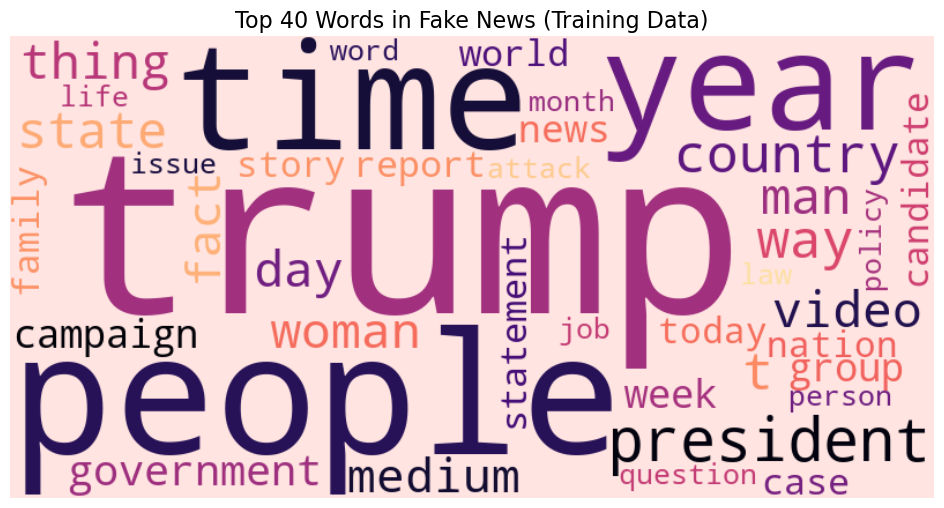

In [236]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
train_fake_news=train_df[train_df["news_label"] == 0 ]["lemmatized_text"]
train_fake_news=train_fake_news.dropna().astype(str).values
train_fake_news=" ".join(train_fake_news)
# Generate word cloud for True News
wc = WordCloud(width=800, height=400, max_words=40,background_color='mistyrose', colormap='magma')
wc.generate(train_fake_news)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)', fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [241]:
# Write a function to get the specified top n-grams

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    freqs = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    
    # Create frequency DataFrame
    freq_df = pd.DataFrame({'ngram': vocab, 'frequency': freqs})
    freq_df = freq_df.sort_values(by='frequency', ascending=False).head(top_n)
    
    return freq_df

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [244]:
# Handle NaN values in the text data

train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

top 10 unigrams by frequency in true news: 
     ngram  frequency
     trump      21483
     state      14174
government      13709
      year      13188
    people      10716
  election       9924
   country       9652
  official       9103
     party       7659
  campaign       7591


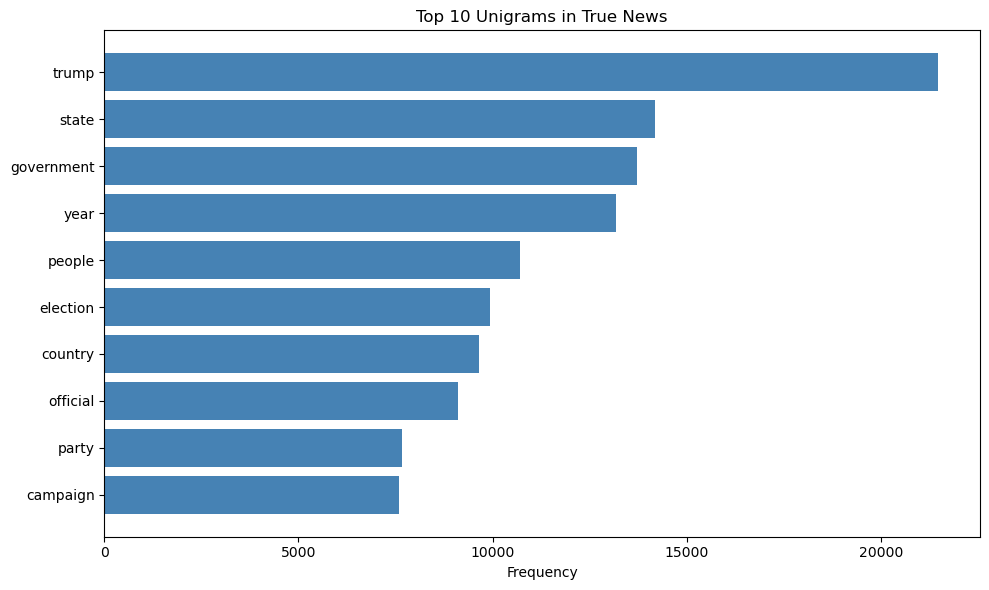

In [248]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Extract top 10 unigrams from true news
true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']
top_unigrams_true = get_top_ngrams(true_news, ngram_range=(1, 1), top_n=10)
print("top 10 unigrams by frequency in true news: ")
print(top_unigrams_true.to_string(index=False))

# Plot the results
plt.figure(figsize=(10, 6))
# here [::-1] reverses the order so the most frequent n-gram appears at the top of the chart.
plt.barh(top_unigrams_true['ngram'][::-1], top_unigrams_true['frequency'][::-1], color='steelblue') 
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.tight_layout()
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



top 10 bigrams by frequency in true news: 
               ngram  frequency
     news conference        954
      trump campaign        862
trump administration        769
          tax reform        735
      climate change        735
     percent percent        709
     request comment        703
      security force        680
house representative        629
 intelligence agency        599


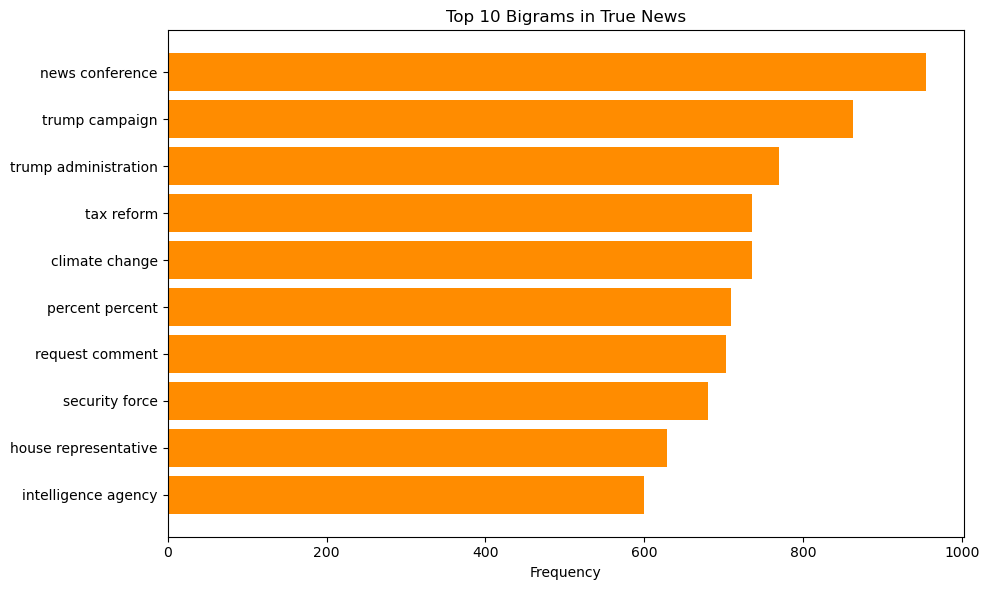

In [251]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Extract top 10 bigrams from true news
true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']
top_bigrams_true = get_top_ngrams(true_news, ngram_range=(2, 2), top_n=10)
print("top 10 bigrams by frequency in true news: ")
print(top_bigrams_true.to_string(index=False))

#Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams_true['ngram'][::-1], top_bigrams_true['frequency'][::-1], color='darkorange')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.tight_layout()
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams by frequency in true news:
                          ngram  frequency
   official condition anonymity        211
               tax rate percent        163
      article staff involvement        131
     staff involvement creation        131
involvement creation production        131
      state department official        122
           rate percent percent        114
               use email server         98
          trump transition team         91
             care act obamacare         83


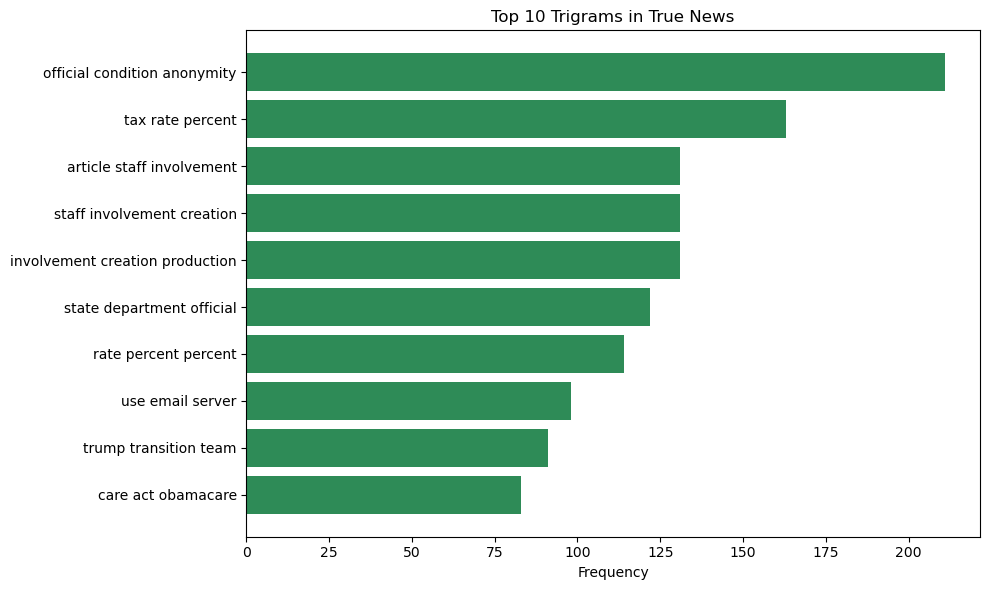

In [254]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Extract top 10 trigrams by frequency from true news
true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']
top_trigrams_true = get_top_ngrams(true_news, ngram_range=(3, 3), top_n=10)

# Print results
print("Top 10 trigrams by frequency in true news:")
print(top_trigrams_true.to_string(index=False))

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_trigrams_true['ngram'][::-1], top_trigrams_true['frequency'][::-1], color='seagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

top 10 unigrams by frequency in fake news: 
    ngram  frequency
    trump      34467
   people      18450
     time      11214
     year      10518
president      10114
    image       9775
    state       8744
    video       7999
    woman       7978
 campaign       7777


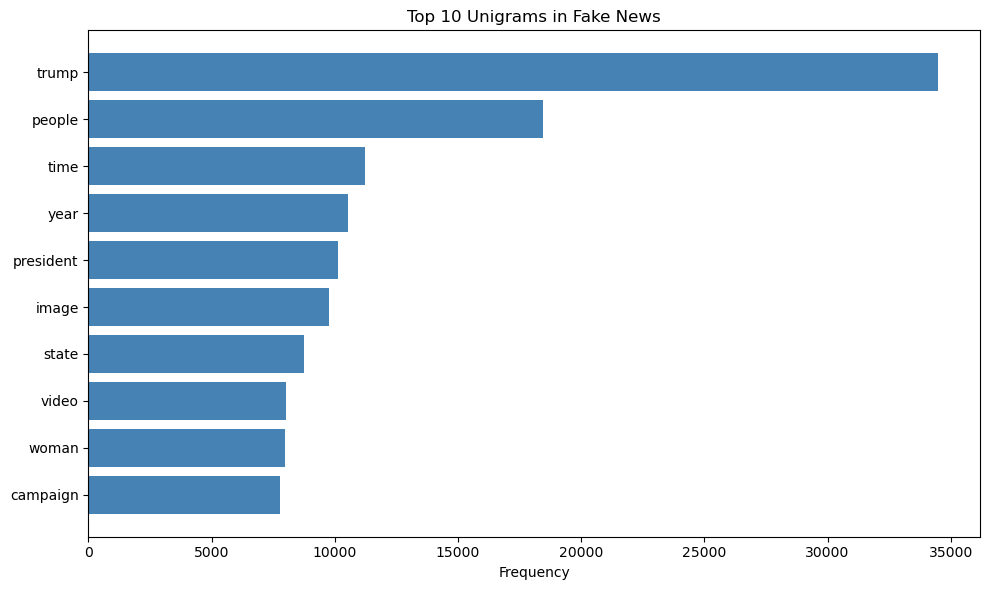

In [258]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Extract top 10 unigrams from fake news
fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']
top_unigrams_fake = get_top_ngrams(fake_news, ngram_range=(1, 1), top_n=10)
print("top 10 unigrams by frequency in fake news: ")
print(top_unigrams_fake.to_string(index=False))

# Plot the results
plt.figure(figsize=(10, 6))
# here [::-1] reverses the order so the most frequent n-gram appears at the top of the chart.
plt.barh(top_unigrams_fake['ngram'][::-1], top_unigrams_fake['frequency'][::-1], color='steelblue') 
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



top 10 bigrams by frequency in fake news: 
                ngram  frequency
      trump supporter       1460
          image image       1342
         century wire       1168
       police officer       1156
       trump campaign       1148
      law enforcement       1067
         donald trump        929
       screen capture        922
trump realdonaldtrump        842
    mainstream medium        714


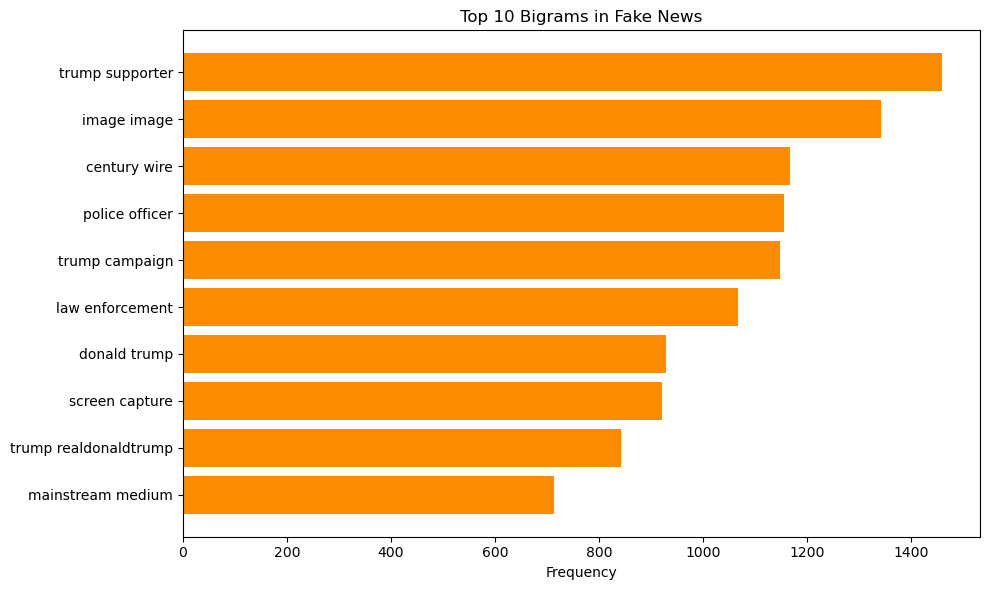

In [261]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Extract top 10 bigrams from fake news
fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']
top_bigrams_fake = get_top_ngrams(fake_news, ngram_range=(2, 2), top_n=10)
print("top 10 bigrams by frequency in fake news: ")
print(top_bigrams_fake.to_string(index=False))

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams_fake['ngram'][::-1], top_bigrams_fake['frequency'][::-1], color='darkorange')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



top 10 trigrams by frequency in fake news: 
                  ngram  frequency
      news century wire        608
   video screen capture        492
     image video screen        455
      image getty image        358
   image screen capture        315
       image chip image        171
      century wire file        168
law enforcement officer        163
 image video screenshot        161
  broadcast boiler room        156


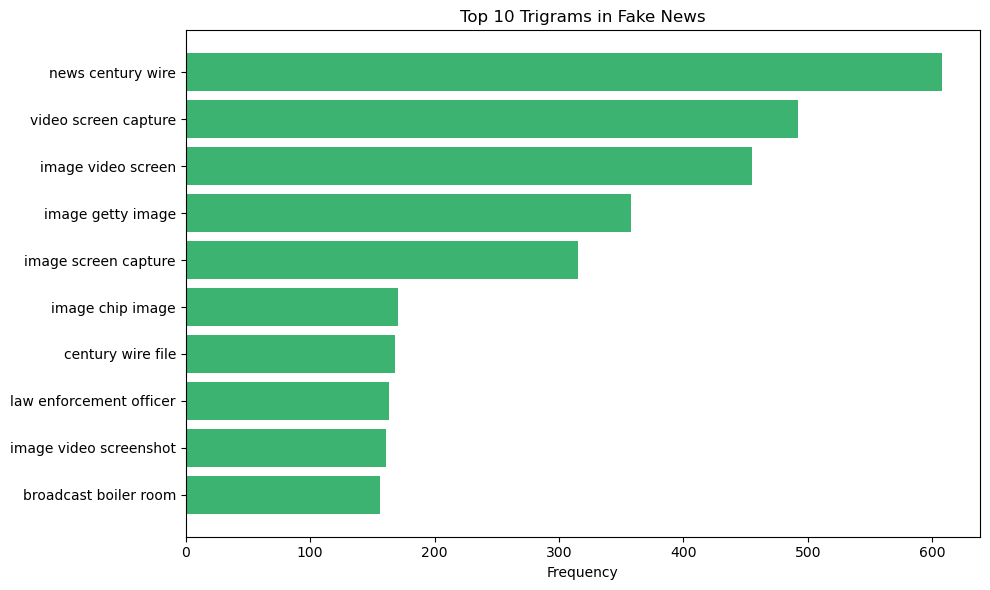

In [264]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Extract top 10 trigrams from fake news
fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']
top_trigrams_fake = get_top_ngrams(fake_news, ngram_range=(3, 3), top_n=10)
print("top 10 trigrams by frequency in fake news: ")
print(top_trigrams_fake.to_string(index=False))

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_trigrams_fake['ngram'][::-1], top_trigrams_fake['frequency'][::-1], color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [269]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [272]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [276]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [279]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [283]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [286]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [290]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [293]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [296]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [300]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [303]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [306]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [310]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
w2v_model = api.load("word2vec-google-news-300")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [312]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def document_vector(doc, model):
    words = doc.split()
    valid_words = [word for word in words if word in model]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in valid_words], axis=0)

## Extract the target variable for the training data and validation data

# Drop rows with NaN values from train and test sets
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
# Apply to training data
X_train = np.array([document_vector(text, w2v_model) for text in train_df['lemmatized_text']])
# Apply to validation data
X_test = np.array([document_vector(text, w2v_model) for text in test_df['lemmatized_text']])

y_train=train_df["news_label"].values
y_test=test_df["news_label"].values

#print the shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (31428, 300)
X_test shape: (13466, 300)
y_train shape: (31428,)
y_test shape: (13466,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [321]:
## Initialise Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
logreg_model.fit(X_train, y_train)
## Predict on validation data
y_pred_logreg = logreg_model.predict(X_test)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [324]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

# Print results
print("Evaluation Metrics for Logistic Regression:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")



Evaluation Metrics for Logistic Regression:
Accuracy:  0.9002
Precision: 0.8947
Recall:    0.8981
F1 Score:  0.8964


In [326]:
# Classification Report

# Generate report
report = classification_report(y_test, y_pred_logreg, target_names=['FAKE', 'REAL'])

# Print report
print("Logistic Regression Classification Report:")
print(report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        FAKE       0.91      0.90      0.90      6992
        REAL       0.89      0.90      0.90      6474

    accuracy                           0.90     13466
   macro avg       0.90      0.90      0.90     13466
weighted avg       0.90      0.90      0.90     13466



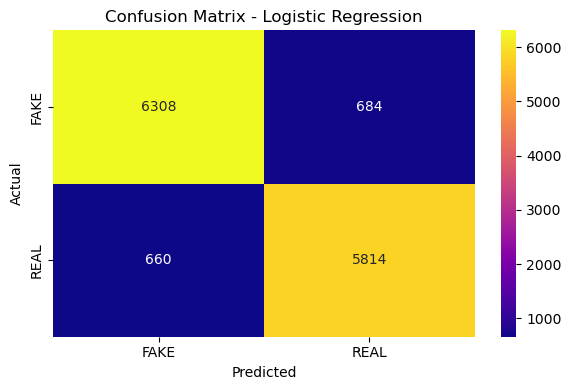

In [328]:
#Lets print confusion matrix for better understanding

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [332]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train, y_train)

## Predict on validation data
y_pred_dt = dt_model.predict(X_test)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [334]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Print results
print("Evaluation Metrics for Decision Tree:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Evaluation Metrics for Decision Tree:
Accuracy:  0.8247
Precision: 0.8313
Recall:    0.7970
F1 Score:  0.8138


In [335]:
# Classification Report

# Generate and print the report
report_dt = classification_report(y_test, y_pred_dt, target_names=['FAKE', 'REAL'])
print("Decision Tree Classification Report:")
print(report_dt)


Decision Tree Classification Report:
              precision    recall  f1-score   support

        FAKE       0.82      0.85      0.83      6992
        REAL       0.83      0.80      0.81      6474

    accuracy                           0.82     13466
   macro avg       0.83      0.82      0.82     13466
weighted avg       0.82      0.82      0.82     13466



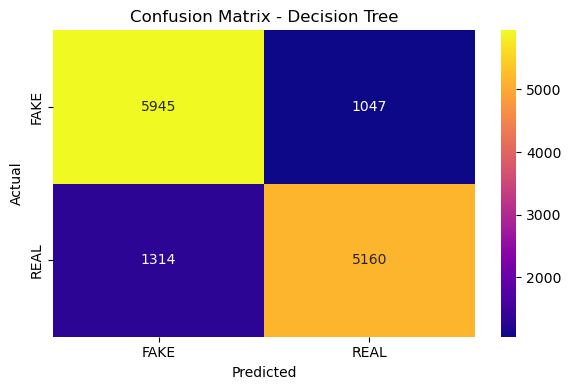

In [336]:
#Lets print confusion matrix for better understanding

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [343]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

## Train Random Forest model on training data
rf_model.fit(X_train, y_train)

## Predict on validation data
y_pred_rf = rf_model.predict(X_test)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [345]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print results
print("Evaluation Metrics for Random Forest:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Evaluation Metrics for Random Forest:
Accuracy:  0.9047
Precision: 0.9107
Recall:    0.8889
F1 Score:  0.8997


In [346]:
# Classification Report

# Generate and print the report
report_rf = classification_report(y_test, y_pred_rf, target_names=['FAKE', 'REAL'])
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91      6992
        REAL       0.91      0.89      0.90      6474

    accuracy                           0.90     13466
   macro avg       0.91      0.90      0.90     13466
weighted avg       0.90      0.90      0.90     13466



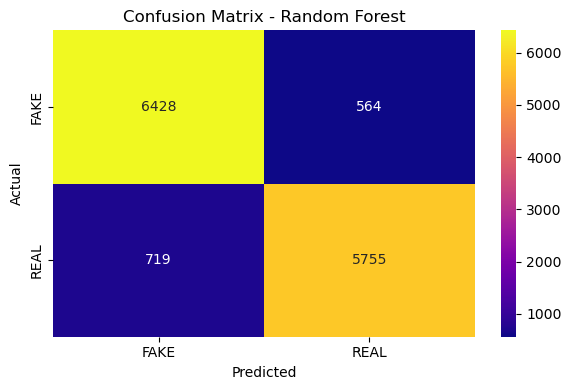

In [347]:
#Lets print confusion matrix for better understanding

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

### Conclusion

In this project, we tackled the challenge of fake news detection using semantic classification techniques. By leveraging Word2Vec embeddings and supervised learning models, we were able to capture hidden insights in textual data that distinguish between true and fake news.

### Observed Patterns

- **Fake news** often exhibited emotionally charged language, repetitive phrasing, and exaggerated claims.
- **True news** tended to be more structured, fact-oriented, and lexically diverse.
- Semantic embeddings helped surface these patterns by representing contextual meaning beyond simple keyword matching.

### Model Comparison

We evaluated three models:

| Model               | Accuracy | FAKE F1 | REAL F1 |
|---------------------|----------|---------|---------|
| Logistic Regression | 0.90     | ~0.90   | ~0.90   |
| Decision Tree       | 0.82     | 0.83    | 0.81    |
| Random Forest       | 0.90     | 0.91    | 0.90    |

- **Random Forest** emerged as the best-performing model, slightly outperforming Logistic Regression in recall for fake news.
- **Decision Tree**, while interpretable, showed signs of overfitting and lower generalization.

### Evaluation Metric Prioritised

**F1-score** is prioritised, especially for the FAKE class, to balance precision and recall. This was crucial to minimize both false positives (mislabeling real news) and false negatives (missing fake news), which have different but significant consequences.

### Impact of Semantic Classification

- The use of semantic embeddings enabled the models to generalize better across varied writing styles and topics.
- It reduced reliance on surface-level features and improved robustness against adversarial or misleading phrasing.
- The modular pipeline built around this approach is scalable, reproducible, and adaptable to other text classification tasks.

---

This workflow demonstrates how semantic modeling, combined with ensemble learning, can effectively address misinformation detection with high accuracy and interpretability.